# Capgemini Employee Happiness

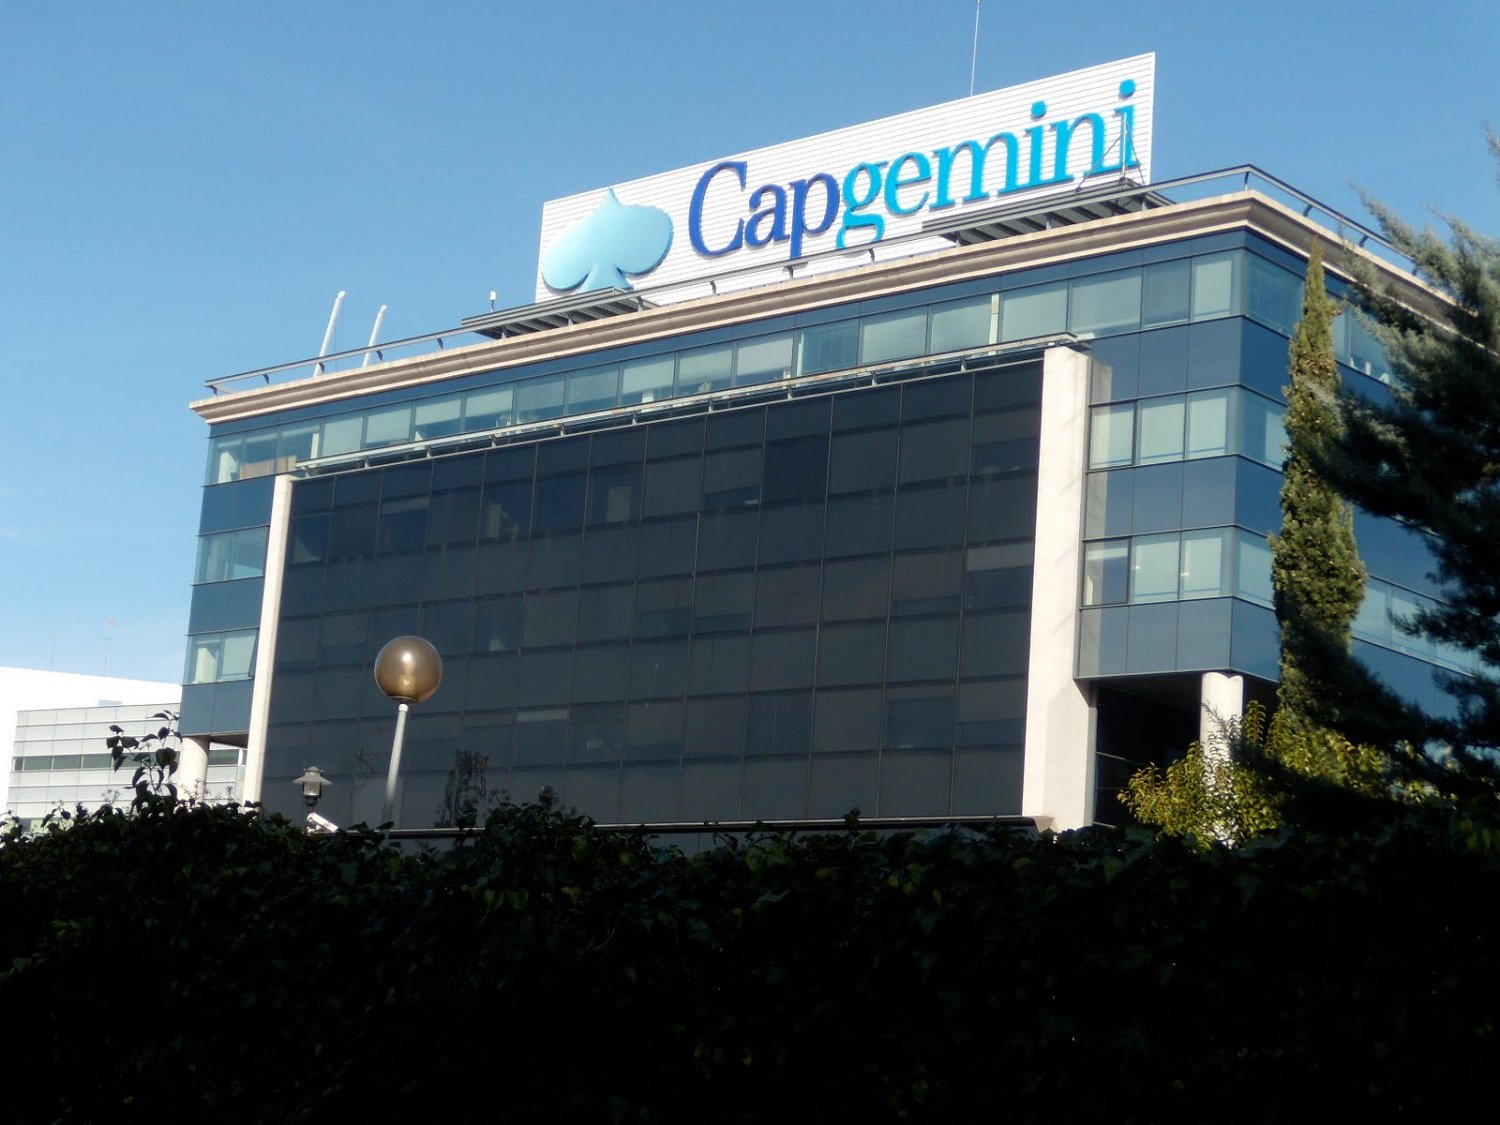

# Project Description:

Our team is excited to embark on this class project that places a strong focus on harnessing the power of machine learning techniques to delve into the realm of employee satisfaction within the Capgemini company. Our primary objective is to get valuable insights into the numerous factors that underlie employee satisfaction in this specific organization. Through this analysis, we aim to predict employee satisfaction ratings using a diverse set of machine learning techniques, including but not limited to sentiment analysis and classification algorithms.


The potential outcomes of this analysis hold significant promise for Capgemini and similar companies. By tapping into the predictive power of machine learning, our project has the capacity to significantly elevate employee morale and overall satisfaction. Furthermore, it could equip a company with the knowledge needed to make data-driven decisions and implement targeted strategies aimed at optimizing the working environment and enhancing the overall employee experience.
 

To facilitate this endeavor, we will be utilizing a Kaggle dataset that captures self-reported employee satisfaction data from within Capgemini. This dataset will serve as the foundational basis for our analysis. In our pursuit of comprehensive understanding, we may augment this primary dataset with additional relevant data sources. These supplementary datasets may include information on salary structures, demographics, and other factors that are not originally included in the core dataset. By incorporating this supplementary data, we aim to gain a more holistic perspective on the intricacies of employee satisfaction, and thereby refine the accuracy and depth of our predictive models.
 

By the conclusion of this project, we anticipate having not only a predictive model for employee satisfaction but also a wealth of knowledge that can empower Capgemini and similar enterprises to cultivate a more positive and productive work environment for their staff.


References:

 https://www.kaggle.com/datasets/manishkr1754/capgemini-employee-reviews-dataset

 

# The Model

The data is an extensive survey done at the Capgemini company to evaluate the overall employees' satisfaction in their jobs.

Here is an overview of the file:

In [256]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('data/Capgemini_Employee_Reviews_from_AmbitionBox.csv')


In [257]:
df.head()

,Title,Place,Job_type,Department,Date,Overall_rating,work_life_balance,skill_development,salary_and_benefits,job_security,career_growth,work_satisfaction,Likes,Dislikes
0,Senior Consultant,Pune,Full Time,General Insurance Department,8 Sep 2023,4.0,4.0,3.0,3.0,4.0,4.0,4.0,Deserved candidates are promoted promptly.\nUn...,With designation promotions good salary increm...
1,Senior Software Engineer,"Kolkata, West Bengal",Full Time,Software Development Department,7 Sep 2023,3.0,4.0,4.0,3.0,4.0,4.0,3.0,You got lot of learning platform and monthly l...,You will get fully not tech project.\nThere is...
2,Senior Consultant,"Bengaluru/Bangalore, Karnataka",Full Time,Software Development Department,6 Sep 2023,4.0,4.0,5.0,3.0,3.0,4.0,3.0,Based on which Business Unit you are you will ...,Some top level management people bring bad nam...
3,Senior Consultant,"Pune, Maharashtra",Full Time,Banking Operations Department,6 Sep 2023,1.0,2.0,4.0,1.0,4.0,1.0,1.0,Some client projects are good as they use the ...,"Culture, micro management, unprofessional beha..."
4,Team Lead,"Noida, Uttar Pradesh",Full Time,IT Infrastructure Services Department,5 Sep 2023,4.0,5.0,4.0,4.0,4.0,4.0,3.0,"I have worked in IBM (4 years) ,TCS (1 year) ,...",Medical insurance amount is quite low compare ...


In [258]:
column_names = df.columns.tolist()
df_cols = pd.DataFrame( {'Columns': column_names} )

# Print the list of column names
df_cols

,Columns
0,Title
1,Place
2,Job_type
3,Department
4,Date
5,Overall_rating
6,work_life_balance
7,skill_development
8,salary_and_benefits
9,job_security


# 1. Data Preparation - Jace Rhea


## Analyzing the Dataset

In [259]:
df.head()

,Title,Place,Job_type,Department,Date,Overall_rating,work_life_balance,skill_development,salary_and_benefits,job_security,career_growth,work_satisfaction,Likes,Dislikes
0,Senior Consultant,Pune,Full Time,General Insurance Department,8 Sep 2023,4.0,4.0,3.0,3.0,4.0,4.0,4.0,Deserved candidates are promoted promptly.\nUn...,With designation promotions good salary increm...
1,Senior Software Engineer,"Kolkata, West Bengal",Full Time,Software Development Department,7 Sep 2023,3.0,4.0,4.0,3.0,4.0,4.0,3.0,You got lot of learning platform and monthly l...,You will get fully not tech project.\nThere is...
2,Senior Consultant,"Bengaluru/Bangalore, Karnataka",Full Time,Software Development Department,6 Sep 2023,4.0,4.0,5.0,3.0,3.0,4.0,3.0,Based on which Business Unit you are you will ...,Some top level management people bring bad nam...
3,Senior Consultant,"Pune, Maharashtra",Full Time,Banking Operations Department,6 Sep 2023,1.0,2.0,4.0,1.0,4.0,1.0,1.0,Some client projects are good as they use the ...,"Culture, micro management, unprofessional beha..."
4,Team Lead,"Noida, Uttar Pradesh",Full Time,IT Infrastructure Services Department,5 Sep 2023,4.0,5.0,4.0,4.0,4.0,4.0,3.0,"I have worked in IBM (4 years) ,TCS (1 year) ,...",Medical insurance amount is quite low compare ...


In [260]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26993 entries, 0 to 26992
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Title                25913 non-null  object 
 1   Place                24597 non-null  object 
 2   Job_type             11556 non-null  object 
 3   Department           22083 non-null  object 
 4   Date                 25915 non-null  object 
 5   Overall_rating       25898 non-null  float64
 6   work_life_balance    26977 non-null  float64
 7   skill_development    26976 non-null  float64
 8   salary_and_benefits  26947 non-null  float64
 9   job_security         26943 non-null  float64
 10  career_growth        26931 non-null  float64
 11  work_satisfaction    26909 non-null  float64
 12  Likes                23905 non-null  object 
 13  Dislikes             23038 non-null  object 
dtypes: float64(7), object(7)
memory usage: 2.9+ MB


In [261]:
print (f"The following features have missing data.")
df.isnull().sum()

The following features have missing data.


Title                   1080
Place                   2396
Job_type               15437
Department              4910
Date                    1078
Overall_rating          1095
work_life_balance         16
skill_development         17
salary_and_benefits       46
job_security              50
career_growth             62
work_satisfaction         84
Likes                   3088
Dislikes                3955
dtype: int64

### Ratings by Frequency

C:\Users\jacer\AppData\Local\Temp\ipykernel_24648\4035771732.py:9: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


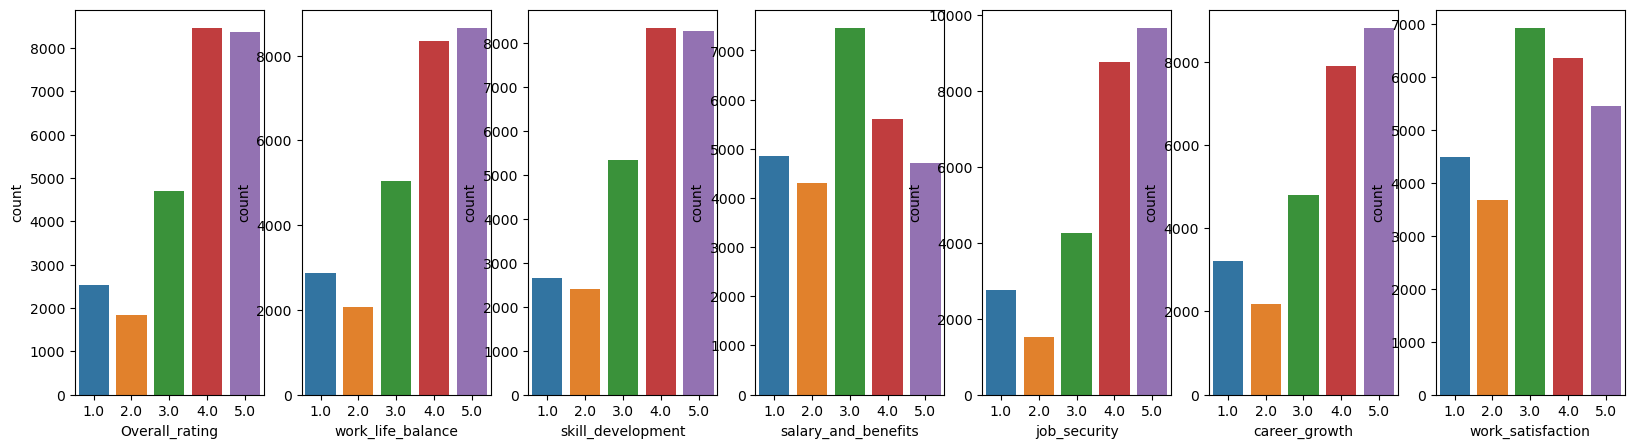

In [262]:
import seaborn as sns

categorical_columns = ['Overall_rating', 'work_life_balance', 'skill_development', 'salary_and_benefits', 'job_security', 'career_growth', 'work_satisfaction']

fig, ax =plt.subplots(1, 7)
fig.set_size_inches(20, 5)
for index, column in enumerate(categorical_columns):
    sns.countplot(df, x=column, ax=ax[index])
fig.show()

### Correlation of Ratings

In [263]:
import pandas as pd
import numpy as np

rs = np.random.RandomState(0)
corr = df.corr()
corr.style.background_gradient()

C:\Users\jacer\AppData\Local\Temp\ipykernel_24648\3121507355.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


,Overall_rating,work_life_balance,skill_development,salary_and_benefits,job_security,career_growth,work_satisfaction
Overall_rating,1.000000,0.672283,0.675040,0.625898,0.618372,0.701954,0.646050
work_life_balance,0.672283,1.000000,0.701130,0.653832,0.686758,0.761251,0.660388
skill_development,0.675040,0.701130,1.000000,0.653982,0.666501,0.746995,0.725923
salary_and_benefits,0.625898,0.653832,0.653982,1.000000,0.580895,0.696413,0.749218
job_security,0.618372,0.686758,0.666501,0.580895,1.000000,0.727832,0.654434
career_growth,0.701954,0.761251,0.746995,0.696413,0.727832,1.000000,0.726225
work_satisfaction,0.646050,0.660388,0.725923,0.749218,0.654434,0.726225,1.000000


In [264]:
ix = corr.sort_values('Overall_rating', ascending=False).index
ix = ix.drop('Overall_rating')
print(f'The self rankings with the highest to lowest correlation with Overall_rating are: {ix}')

The self rankings with the highest to lowest correlation with Overall_rating are: Index(['career_growth', 'skill_development', 'work_life_balance',
       'work_satisfaction', 'salary_and_benefits', 'job_security'],
      dtype='object')


In [265]:
print(f'The self rankings with the highest correlation are {ix[0]} and {ix[2]} with a correlation of {corr.loc[ix[0], ix[2]]}')

The self rankings with the highest correlation are career_growth and work_life_balance with a correlation of 0.7612514675083212


In [266]:
print(f'The self rankings with the lowest correlation are {ix[4]} and {ix[5]} with a correlation of {corr.loc[ix[4], ix[5]]}')

The self rankings with the lowest correlation are salary_and_benefits and job_security with a correlation of 0.5808948987666473


## Cleaning the data

### Remove rows where overall_rating is null
Drop rows with missing values in the column Overall_rating. Overall rating is the target column and required for classification.

In [267]:

# Title is almost always missing when overall rating is missing
before_drop = len(df.index)
df = df.dropna(subset=['Title', 'Overall_rating'])
after_drop = len(df.index)
print(f"There were {before_drop} rows before dropping 'Overall_rating' and {after_drop} rows after dropping 'Overall_rating'")

There were 26993 rows before dropping 'Overall_rating' and 25896 rows after dropping 'Overall_rating'


### Impune Missing Data

In [268]:
# fill in empty values with NA
# fix Place data
no_place = {
"..": "na",
"any location": "na",
"any": "na",
"any place": "na",
"client location ": "na",
"client office": "na",
"confidential": "na",
"customer location": "na",
"do not with to disclose": "na",
"doesn" "t matter": "na",
"everywhere": "na",
"i don" "t know i did only internship only": "na",
"no idea": "na",
"office": "na",
"somewhere": "na",
"xyz": "na",
"it's very good experience."    : 'na',
"i don't know i did only internship only": "na"
}

outside_india = {
    "uk": "united kingdom",
    "usa": "united states",
    "sydneu": "sydney",
}

bangalore = {
   "6b bangalore": "bangalore",
"6b ecospace": "bangalore",
"6b": "bangalore",
"bagalore": "bangalore",
"baglore": "bangalore",
"bamgalore": "bangalore",
"banagalore": "bangalore",
"banaglore": "bangalore",
"bangaloe": "bangalore",
"bangalor": "bangalore",
"bangalore 6b": "bangalore",
"bangalore dtp": "bangalore",
"bangalore epip": "bangalore",
"bangalore rural": "bangalore",
"bangalore urban": "bangalore",
"bangalore whitefield": "bangalore",
"bangalore.": "bangalore",
"bangalore/bengaluru": "bangalore",
"bangalores": "bangalore",
"bangalorr": "bangalore",
"bangaluru": "bangalore",
"banglore bmp": "bangalore",
"banglore datacom": "bangalore",
"banglore whitefield": "bangalore",
"banglore": "bangalore",
"bbangalore": "bangalore",
"bengalore": "bangalore",
"bengaluru": "bangalore",
"bengaluru/bangalore": "bangalore",
"benglore": "bangalore",
"benguluru": "bangalore",
"blore": "bangalore",
"blr": "bangalore",
"capgemini bangalore": "bangalore",
"dtp bangalore": "bangalore",
"dtp": "bangalore",
"whietfield": "bangalore",
"whiltefield": "bangalore",
"whiltefield": "bangalore",
"white feeld": "bangalore",
"white field dtp": "bangalore",
"white field summit towers a": "bangalore",
"white field": "bangalore",
"White Filed": "bangalore",
"white filed": "bangalore",
"whitefield bangalore": "bangalore",
"whitefield": "bangalore",
"whitefiled": "bangalore",
"whitfield": "bangalore",
}

rest_of_india = {
    "hyderabad/secunderabad": "hyderabad",
    "hyderbad": "hyderabad",
    "hydrabad": "hyderabad",
    "hyder": "hyderabad",
    "hyd": "hyderabad",
    "navi mumbai": "mumbai",
    "mumbai suburban": "mumbai",
    "airoli mumbai": "mumbai",
    "mumbai airoli": "mumbai",
    "airoli navi mumbai": "mumbai",
    "airloi": "mumbai",
    "airoli sez": "mumbai",
    "airloi": "mumbai",
    "airoli,mumbai": "mumbai",
    "airoli,navi mumbai": "mumbai",
    "airolo": "mumbai",
    "airoli sez": "mumbai",
    "airoli west": "mumbai",
    "airoli,maharashtra": "mumbai",
    "airolo": "mumbai",
    "airoil mumbai": "mumbai",
    "airoli yosemite": "mumbai",
    "airoli mindspace": "mumbai",
    "airolii": "mumbai",
    "aeroli": "mumbai",
    "airoli mindspace": "mumbai",
    "new mumbai": "mumbai",
    "vikhroli": "vikhroli",
    "vikhroli - mumbai": "vikhroli",
    "vikhroli east": "vikhroli",
    "vikhroli,mumbai and airoli": "vikhroli",
    "vikroli": "vikhroli",
    "vikroholi": "vikhroli",
    "vikhroli office": "vikhroli",
    "vikhroli mumbai": "vikhroli",
    "vikhroli,mumbai": "vikhroli",
    "vikhrolli": "vikhroli",
    "vikhrolli": "vikhroli",
    "gurgaon/gurugram": "gurgaon",
    "gurugram": "gurgaon",
    "greater noida": "noida",
    "noida nsez": "noida",
    "nsez noida": "noida",
    "nsez": "noida",
    "noida sez": "noida",
    "new delhi": "delhi",
    "delhi ncr": "delhi",
    "talwade pune": "pune",
    "pune talwade": "pune",
    "punr": "pune",
    "hinjewadi pune": "pune",
    "pune hinjewadi": "pune",
    "chenani": "chennai",
    "trichy": "tiruchirappalli",
    "tiruchirapalli": "tiruchirappalli",
    "tiruchuli": "tiruchirappalli",
    "selam": "salem",
    "yasomite airoli": "yosemite airoli",

    "wfh (working remotely)": "remote",
    "work from home (working remotely)": "remote",
    "remote (working remotely)": "remote",
    "remotely": "remote",
    "although i am still working from home so it depends project to project": "remote",
    "home": "remote",
    "no i work from home only during vivid 29": "remote",
    "trich": "tiruchirapalli",
    "trichirapalli": "tiruchirapalli",
    "trichy,vrn": "tiruchirapalli",
    "trichirapalli": "tiruchirapalli",
    "trichirappalli": "tiruchirapalli",
    "talawade": "pune",
    "talwade": "pune",
    "pu ne": "pune",
    "pu e": "pune",
    "pu": "pune",
    "talvade pune": "pune",
    "talwadde": "pune",
    "talawde": "pune",
    "pune,talawade": "pune",
    "talawade,pune": "pune",
    "pube": "pune",
    "talwade,pune": "pune",
    "talawade pune": "pune",
    "talwade pune. depend it" "s chandes": "pune",
}

all_places = no_place | outside_india | bangalore | rest_of_india


df["Place"] = df["Place"].fillna("na").apply(lambda x: x.lower().split(", ")[0])
df["Place"] = df["Place"].replace(all_places)

# where Place is NA and titla contains the phrase "Remotely" we can assume they work remotely for their Place.
def isRemoteTitle(title, place):
    if "na" == place and "Remotely".casefold() in title.casefold():
        return "remote"
    else:
        return place
df["Place"] = df.apply(lambda x: isRemoteTitle(x.Title, x.Place), axis=1)        

### Parse Dates and fill in missing ones

In [269]:
def get_date(x):
    try:
        return str(x)[2:]
    except:
        return 'None'
df['Date'] = df['Date'].fillna('0 None').apply(get_date)
df['Date'] = pd.to_datetime(df['Date'], format="%b %Y",  errors='raise')


### Fill missing rating data

In [271]:
# Set ratings as categorical data
from pandas import CategoricalDtype
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer, SimpleImputer

rating_columns = ['Overall_rating', 'work_life_balance', 'skill_development', 'salary_and_benefits', 'job_security', 'career_growth', 'work_satisfaction']

# use SimpleImputer to fill missing values for columnn Overall_rating with the most frequent value
for column in rating_columns:
    imputer = SimpleImputer(strategy='most_frequent')
    df[column] = imputer.fit_transform(df[[column]])
    df[column] = df[column].astype('int32')

for column in rating_columns:
    df[column] = df[column].astype('float64')


### Missing Job Types

In [189]:
# Set job_type
from pandas import CategoricalDtype
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer, SimpleImputer

job_type_columns = ['Job_type']

# use SimpleImputer to fill missing values for columnn Overall_rating with the most frequent value
for column in job_type_columns:
    imputer = SimpleImputer(strategy='most_frequent')
    df[column] = imputer.fit_transform(df[[column]])
    df[column] = df[column].astype('string')

job_type_categories = CategoricalDtype(categories=['Contractual', 'Freelancer', 'Full Time', 'Intern', 'Part Time'])

for column in job_type_columns:
    df[column] = df[column].astype(job_type_categories)

In [190]:
# Set rest of columns as strings
string_columns = ['Title', 'Place', 'Department', 'Likes', 'Dislikes']

for column in string_columns:
    df[column] = df[column].astype('string')

In [191]:
print('Data after preperation')
df.info()

Data after preperation
<class 'pandas.core.frame.DataFrame'>
Int64Index: 25896 entries, 0 to 26975
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Title                25896 non-null  string        
 1   Place                25896 non-null  string        
 2   Job_type             25896 non-null  category      
 3   Department           22066 non-null  string        
 4   Date                 25896 non-null  datetime64[ns]
 5   Overall_rating       25896 non-null  category      
 6   work_life_balance    25896 non-null  category      
 7   skill_development    25896 non-null  category      
 8   salary_and_benefits  25896 non-null  category      
 9   job_security         25896 non-null  category      
 10  career_growth        25896 non-null  category      
 11  work_satisfaction    25896 non-null  category      
 12  Likes                23892 non-null  string        
 13  Dislikes

# Analyzation of Dataset - Jace Rhea

# Correlation of rating data

# Yonghee - Data preProcessing

In [195]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew
import os

In [196]:
# number of unique records, total records and column data type
for col in df.columns:
    a = col,len(df[col].unique()),len(df[col])
    b=df[col].dtypes
    print(a,b)

('Title', 4236, 25896) string
('Place', 531, 25896) string
('Job_type', 5, 25896) category
('Department', 620, 25896) string
('Date', 74, 25896) datetime64[ns]
('Overall_rating', 5, 25896) category
('work_life_balance', 5, 25896) category
('skill_development', 5, 25896) category
('salary_and_benefits', 5, 25896) category
('job_security', 5, 25896) category
('career_growth', 5, 25896) category
('work_satisfaction', 5, 25896) category
('Likes', 17498, 25896) string
('Dislikes', 17552, 25896) string


In [197]:
df.describe()

C:\Users\jacer\AppData\Local\Temp\ipykernel_24648\3627053830.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df.describe()


,Title,Place,Job_type,Department,Date,Overall_rating,work_life_balance,skill_development,salary_and_benefits,job_security,career_growth,work_satisfaction,Likes,Dislikes
count,25896,25896,25896,22066,25896,25896.0,25896.0,25896.0,25896.0,25896.0,25896.0,25896.0,23892,23026
unique,4236,531,5,619,74,5.0,5.0,5.0,5.0,5.0,5.0,5.0,17497,17551
top,Associate Consultant,bangalore,Full Time,Software Development Department,2022-05-01 00:00:00,4.0,5.0,5.0,3.0,5.0,5.0,3.0,Nothing,Nothing
freq,3013,7694,25680,8930,1466,8463.0,8419.0,8038.0,7221.0,9408.0,8594.0,6723.0,815,943
first,NaN,NaN,NaN,NaN,2017-08-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,2023-09-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [198]:
# get the number of missing data points per column
missing_values_count = df.isnull().sum()

# look at the # of missing points in the first ten columns
missing_values_count[0:14]

Title                     0
Place                     0
Job_type                  0
Department             3830
Date                      0
Overall_rating            0
work_life_balance         0
skill_development         0
salary_and_benefits       0
job_security              0
career_growth             0
work_satisfaction         0
Likes                  2004
Dislikes               2870
dtype: int64

In [199]:
# how many total missing values do we have?
total_cells = np.product(df.shape)
total_missing = missing_values_count.sum()

# percent of data that is missing
round((total_missing/total_cells) * 100,2)

2.4

In [200]:
total_cells

362544

In [201]:
total = df.isnull().sum().sort_values(ascending=False)
percent = (100*df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total_Missing', 'Percent_Missing'])
missing_data.head(20)

,Total_Missing,Percent_Missing
Department,3830,14.789929
Dislikes,2870,11.082793
Likes,2004,7.738647
Title,0,0.000000
Place,0,0.000000
Job_type,0,0.000000
Date,0,0.000000
Overall_rating,0,0.000000
work_life_balance,0,0.000000
skill_development,0,0.000000


count     25896
unique        5
top           4
freq       8463
Name: Overall_rating, dtype: int64


<Figure size 800x600 with 0 Axes>

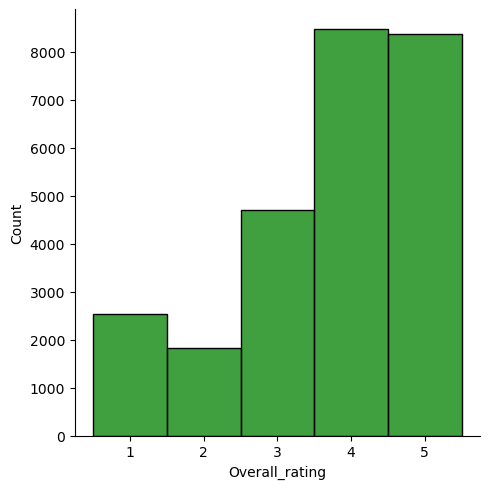

In [202]:
print(df['Overall_rating'].describe())
plt.figure(figsize=(8,6))
sns.displot(df['Overall_rating'],color='green');

count         25896
unique            5
top       Full Time
freq          25680
Name: Job_type, dtype: object


<Figure size 800x600 with 0 Axes>

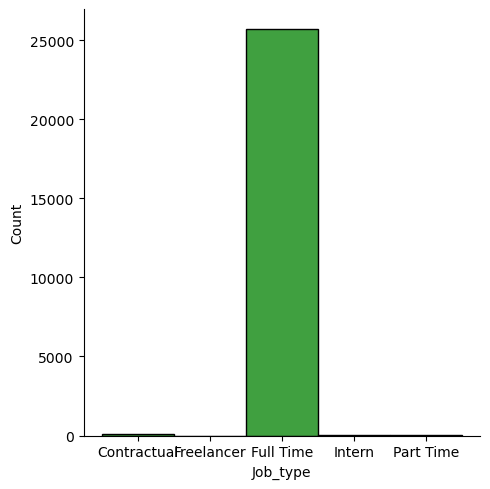

In [203]:
print(df['Job_type'].describe())
plt.figure(figsize=(8,6))
sns.displot(df['Job_type'],color='green');

count                               22066
unique                                619
top       Software Development Department
freq                                 8930
Name: Department, dtype: object


<Figure size 600x800 with 0 Axes>

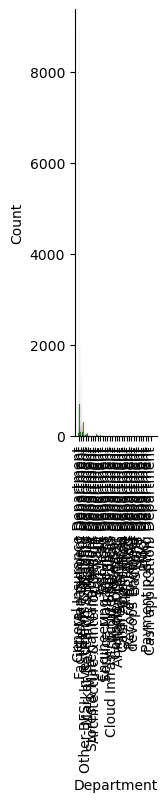

In [204]:
print(df['Department'].describe())
plt.figure(figsize=(6,8))
sns.displot(df['Department'],color='green');

x_labels = df['Department'].unique()[::20]  # 간격 조절
x_ticks = range(0, len(x_labels) * 20, 20)  # 간격에 해당하는 tick 위치 설정
plt.xticks(x_ticks, x_labels, rotation=90)  # 레이블 설정
plt.xlabel("Department")
plt.show()

count         25896
unique          531
top       bangalore
freq           7694
Name: Place, dtype: object


<Figure size 600x800 with 0 Axes>

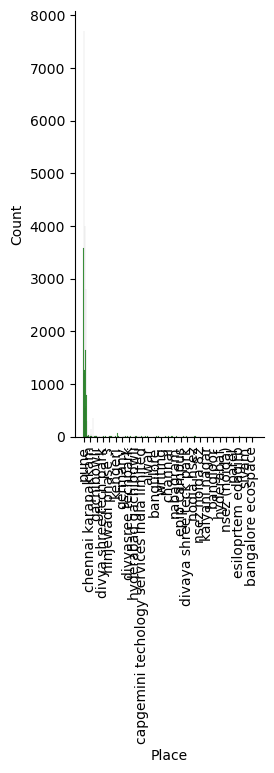

In [205]:
print(df['Place'].describe())
plt.figure(figsize=(6,8))
sns.displot(df['Place'],color='green');

x_labels = df['Place'].unique()[::20]  # 간격 조절
x_ticks = range(0, len(x_labels) * 20, 20)  # 간격에 해당하는 tick 위치 설정
plt.xticks(x_ticks, x_labels, rotation=90)  # 레이블 설정
plt.xlabel("Place")
plt.show()

count                    25896
unique                    4236
top       Associate Consultant
freq                      3013
Name: Title, dtype: object


c:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)


<Figure size 600x800 with 0 Axes>

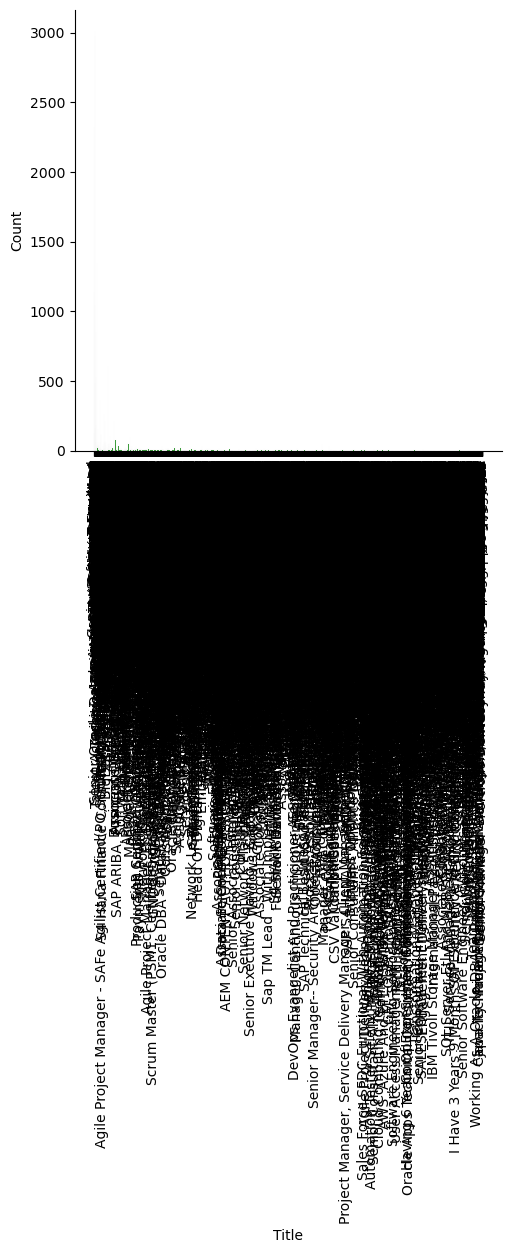

In [206]:
print(df['Title'].describe())
plt.figure(figsize=(6,8))
sns.displot(df['Title'],color='green');

plt.xticks(rotation=90)  # 90도 회전
plt.xlabel("Title")
plt.show()

I think numeric form of Date info will be useful, so I added New Column.

In [207]:
# 'Date' -> 'Date(New)' Format Change
df['Date'] = df['Date'].str.replace('^0', '10', regex=True)

# 'Date(New)' = Year&Month&Day (All Numeric)
df['Date(New)'] = pd.to_datetime(df['Date'], format='%d %b %Y').dt.strftime('%Y%m%d')

# Deleting 'Date' 
# data.drop('Date', axis=1, inplace=True)

# df.to_csv('data_with_date_new2.csv', index=False)
df.to_csv("after prep.csv", index=False)

AttributeError: Can only use .str accessor with string values!

I think Blank data of 'Job_type' can be 'Full Time'

In [ ]:
# Fill the blank with 'Full Time'
df['Job_type'].fillna('Full Time', inplace=True)
df.to_csv("after prep.csv", index=False)

In [ ]:
unique_titles = df['Title'].unique()
number_of_unique_titles = len(unique_titles)

print("Number of unique titles:", number_of_unique_titles)
print("List of unique titles:")
for title in unique_titles:
    print(title)

Number of unique titles: 4236
List of unique titles:
Senior Consultant
Senior Software Engineer
Team Lead
Trade Finance Analyst
Senior Developer
Analyst   (working remotely)
Analyst
Senior Consultant C1
Senior Analyst
Cybersecurity Manager
Problem Manager
Associate Consultant
Engineer
Consultant
Associate Consultant SAP Concur
Software Engineer
Network Security Engineer
Trainer
Solution Architect
Manager
Team Manager
Associate Architect
Senior Professional II
Senior Oracle Database Administrator Consultant
Process Associate A3
Technical Writer Cum Technical Illustrator
Technical Manager
Technical Author
Senior Security Analyst
P.A. Accounts Payable Executive
Talent Acquisition Consultant   (working remotely)
Process Associate
Consultant B2
Senior Professional I Engineer
Scrum Master
Sr.Analyst - Software Engineer
Professional 1
Senior Manager
Data Analyst
Physical Verification Engineer
Sap Mm Consultant
Sr Manager
Senior Consultant   (working remotely)
Process Lead And Subject Matter E

In [ ]:
unique_titles = df['Department'].unique()
number_of_unique_titles = len(unique_titles)

print("Number of unique Department:", number_of_unique_titles)
print("List of unique Department:")
for title in unique_titles:
    print(title)

Number of unique Department: 620
List of unique Department:
General Insurance Department
Software Development Department
Banking Operations Department
IT Infrastructure Services Department
Other Department
IT Consulting Department
Business Intelligence & Analytics Department
IT Security Department
IT Network Department
Operations Support Department
Data Science & Machine Learning Department
Finance Department
Corporate Training Department
Quality Assurance and Testing Department
Recruitment & Talent Acquisition Department
DBA / Data warehousing Department
SCM & Logistics Department
Other Hospital Staff Department
Aviation Engineering Department
DevOps Department
Facility Management Department
Hardware Department
Engineering & Manufacturing Department
Technology / IT Department
Downstream Department
Operations Department
Accounts payable Department
IT Support Department
Accounting & Taxation Department
Applied Innovation Exchange Department
Back Office Department
Software engineer  Depa

# Yonghee - Processing end

# Yonghee - Likes, Dislikes -> Vector

In [ ]:
pip install gensim

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [ ]:
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize
import nltk
import numpy as np

nltk.download('punkt')  # nltk data download

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\jacer\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

Create a Word2Vec model:
- sentences: List of tokenized sentences.
- vector_size: Size of the vectors for each word.
- window: Size of the context window considered by the model.
- min_count: Minimum frequency for a word to be included in the model.
- workers: Number of CPU cores used for model training.

In [ ]:
# Likes Column's Blank -> ' '
df['Likes'].fillna('', inplace=True)

# Text -> Tokenize & Save as List
tokenized_likes = df['Likes'].apply(word_tokenize)

# Word2Vec model - Need to choose the 'Vector size'
word2vec_model = Word2Vec(sentences=tokenized_likes, vector_size=100, window=5, min_count=1, workers=4)

# Vector 
word_vectors = word2vec_model.wv

# make 'Sentence Vectors'
sentence_vectors = tokenized_likes.apply(lambda x: np.mean([word_vectors[token] for token in x if token in word_vectors], axis=0))

# Add 'Sentece_Vector' to dataframe
max_dimensions = max(sentence_vectors.apply(lambda x: len(x) if isinstance(x, np.ndarray) else 0))
for i in range(max_dimensions):
    df[f'Likes_vector_{i}'] = sentence_vectors.apply(lambda x: x[i] if isinstance(x, np.ndarray) and i < len(x) else np.nan)

c:\ProgramData\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\jacer\AppData\Local\Temp\ipykernel_24648\369004302.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'Likes_vector_{i}'] = sentence_vectors.apply(lambda x: x[i] if isinstance(x, np.ndarray) and i < len(x) else np.nan)
C:\Users\jacer\AppData\Local\Temp\ipykernel_24648\369004302.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'Likes_vector_{i}'] 

In [ ]:
# Dislikes Column's Blank -> ' '
df['Dislikes'].fillna('', inplace=True)

# Text -> Tokenize & Save as List
tokenized_dislikes = df['Dislikes'].apply(word_tokenize)

# Word2Vec model for Dislikes
word2vec_model_dislikes = Word2Vec(sentences=tokenized_dislikes, vector_size=100, window=5, min_count=1, workers=4)

# Vector for Dislikes
word_vectors_dislikes = word2vec_model_dislikes.wv

# Make 'Sentence Vectors' for Dislikes
sentence_vectors_dislikes = tokenized_dislikes.apply(lambda x: np.mean([word_vectors_dislikes[token] for token in x if token in word_vectors_dislikes], axis=0))

# Add 'Sentence_Vector' for Dislikes to DataFrame
max_dimensions_dislikes = max(sentence_vectors_dislikes.apply(lambda x: len(x) if isinstance(x, np.ndarray) else 0))
for i in range(max_dimensions_dislikes):
    df[f'Dislikes_vector_{i}'] = sentence_vectors_dislikes.apply(lambda x: x[i] if isinstance(x, np.ndarray) and i < len(x) else np.nan)

c:\ProgramData\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\jacer\AppData\Local\Temp\ipykernel_24648\1445921884.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'Dislikes_vector_{i}'] = sentence_vectors_dislikes.apply(lambda x: x[i] if isinstance(x, np.ndarray) and i < len(x) else np.nan)
C:\Users\jacer\AppData\Local\Temp\ipykernel_24648\1445921884.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'Disli

In [65]:
df

,Title,Place,Job_type,Department,Date,Overall_rating,work_life_balance,skill_development,salary_and_benefits,job_security,...,Dislikes_vector_90,Dislikes_vector_91,Dislikes_vector_92,Dislikes_vector_93,Dislikes_vector_94,Dislikes_vector_95,Dislikes_vector_96,Dislikes_vector_97,Dislikes_vector_98,Dislikes_vector_99
0,Senior Consultant,Pune,Full Time,General Insurance Department,8 Sep 2023,4.0,4.0,3.0,3.0,4.0,...,0.308672,0.644110,0.150128,0.439242,0.890983,0.190872,0.005972,-0.253507,0.321829,-0.595870
1,Senior Software Engineer,"Kolkata, West Bengal",Full Time,Software Development Department,7 Sep 2023,3.0,4.0,4.0,3.0,4.0,...,0.328762,0.676455,0.543379,0.435437,1.116611,0.298430,-0.255538,-0.163778,-0.176276,-0.365353
2,Senior Consultant,"Bengaluru/Bangalore, Karnataka",Full Time,Software Development Department,6 Sep 2023,4.0,4.0,5.0,3.0,3.0,...,0.263270,0.631566,0.374018,0.499798,1.098079,0.329510,-0.222719,-0.012658,-0.333031,-0.203945
3,Senior Consultant,"Pune, Maharashtra",Full Time,Banking Operations Department,6 Sep 2023,1.0,2.0,4.0,1.0,4.0,...,0.242145,0.360591,0.243565,0.483956,1.033355,0.453175,0.311826,-0.208750,-0.059269,-0.484888
4,Team Lead,"Noida, Uttar Pradesh",Full Time,IT Infrastructure Services Department,5 Sep 2023,4.0,5.0,4.0,4.0,4.0,...,0.329408,0.506052,0.289881,0.379573,0.940830,0.240427,-0.106521,-0.068669,-0.140812,-0.306860
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26971,Project Manager,Bangalore,Full Time,Technology / IT Department,10 May 2018,2.0,3.0,2.0,1.0,2.0,...,0.372330,0.681589,0.616028,0.414935,1.113468,0.373098,-0.306167,-0.108707,-0.292127,-0.337108
26972,V And V Test Lead,Navi Mumbai,Full Time,Software Development Department,4 May 2018,5.0,5.0,5.0,4.0,5.0,...,0.269040,0.558198,0.185472,0.574974,1.057107,0.281179,-0.034693,-0.050493,-0.258692,-0.361730
26973,Manager It Operations,Noida,Full Time,IT Support Department,10 Mar 2018,4.0,5.0,4.0,4.0,5.0,...,0.539874,0.124263,0.134176,0.383874,1.086683,0.333560,0.388266,-0.010916,-0.306647,-0.207667
26974,Consultant,NaN,Full Time,Software Development Department,5 Aug 2017,5.0,4.0,4.0,3.0,4.0,...,0.262549,0.219693,0.146397,0.150028,0.599566,0.197089,0.167463,-0.287925,-0.083228,-0.196300



<b> We plan to explore the following machine learning models:

### Classifiers:

<b>LogisticRegression
    
<b>SVC

<b>LinearSVC

<b>KNeighborsClassifier

<b>DecisionTreeClassifier

<b>RandomForestClassifier

<b>GaussianNB

<b>Perceptron
    
<b>SGDClassifier</b>

The database will be split 80% for training and 20% for testing.

<b>Precision score, Accuracy factors and F1 score</b> will be calculated to validate the success of the model training

# Division of Labor

Our initial plan is as follows:

Data Cleaning: Data cleaning, addressing missing data and outliers.

Feature Engineering: Focus on feature selection and engineering.

Modeling: Implementation and comparison of the chosen models.

Validation: Model validation and utilizing cross-validation techniques.

Hyperparameter Tuning: Optimization of model parameters as needed.

<b>Here is the initial role of each team member</b>:


# Jace Rhea

### Model Selection
### Data Analysis and Cleaning
### Project coordination

# Yonghee Kim

### Model Selection
### Data Analysis and Cleaning
### Model Training

# Yu Zhou

### Feature Engineering
### Hyper Parameter Tuning

# Nabil Sleiman

### Model Selection
### Model Evaluation
### Model Validation
### Presentation

Even though we outlined our initial plan, we are <b>prepared to adapt as the project evolves</b> and more insights are gained from the data and models.